# Data Analytics Project

## Topic : **Breast Cancer Prediction**



................................................................................................................................................................................................................................................

## **CRISP-DM**

As it is commonly known, the CRISP-DM process model has been widely used in data science projects. This framework consists of six phases which are business understanding, data understanding, data preparation, modeling, evaluation and deployment. Therefore, the CRISP-DM process model will also be employed in this project.

## **Business Understanding**
Significant of project in business aspect:
- Cancer is a leading cause of death worldwide, accounting for nearly 10 million deaths in 2020, or nearly one in six deaths (WHO, 2022).
- In today's society, breast cancer has become one of the common malignant tumours in women, posing a great threat to the quality of life and the safety of patients.
- Early diagnosis and treatment of breast cancer is an important means of ensuring patient survival.
- Predicting risk factors for breast cancer is important for healthcare providers, insurance companies and individuals alike.
-For healthcare providers, knowing a patient's risk of breast cancer can help to develop interventions in advance to reduce morbidity and mortality.
-For insurance companies, accurately assessing a client's breast cancer risk allows them to optimise pricing strategies and product design.
- For individuals, knowing their own breast cancer risk can help them take
effective preventive measures to safeguard their lives.

Problem Statement:
- Current breast cancer risk prediction methods in the market may have insufficient accuracy and incomplete coverage of risk factors.
- Project aims to develop a breast cancer prediction model based on machine learning techniques to further enhance the accuracy and comprehensiveness of prediction.

Project Objective:

- To extract key information on risk factors of breast cancer
- To select appropriate machine learning algorithms to construct predictive models of breast cancer risk factors.
- To evaluate the performance of the model to ensure that it meets expectations in terms of accuracy and comprehensiveness.
- To select best predictive model to provide breast cancer prediction


## Data Understanding

Link of Dataset used: https://www.bcsc-research.org/data/rf/risk-factor-dataset-download


## **Import data science and visualization libraries**

In [ ]:
#coding:utf-8

import numpy as np
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
sns.set(palette="pastel")

#The magic method in IPython notebook to get the image directly after each run and no longer need to use plt.show()
%matplotlib inline

# Visualization of missing values
import missingno as msno

pylab.rcParams[ 'figure.figsize' ] = 16,9
from scipy.stats import chi2_contingency
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

#Import the warnings package and use filters to implement ignore warning statements.
import warnings
warnings.filterwarnings('ignore')

#Machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
np.random.seed(1234)

### Load Dataset

In [ ]:
ori_data=pd.read_csv('./bcsc_risk_factors.csv')

##### Dataset info

In [ ]:
ori_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509410 entries, 0 to 509409
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   year                   509410 non-null  int64
 1   age_group_5_years      509410 non-null  int64
 2   race_eth               509410 non-null  int64
 3   first_degree_hx        509410 non-null  int64
 4   age_menarche           509410 non-null  int64
 5   age_first_birth        509410 non-null  int64
 6   BIRADS_breast_density  509410 non-null  int64
 7   current_hrt            509410 non-null  int64
 8   menopaus               509410 non-null  int64
 9   bmi_group              509410 non-null  int64
 10  biophx                 509410 non-null  int64
 11  breast_cancer_history  509410 non-null  int64
 12  count                  509410 non-null  int64
dtypes: int64(13)
memory usage: 50.5 MB


All the variables are of categorical variables.

###### View dataframe sample

In [ ]:
ori_data.sample(5)

,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count
26086,2013,8,3,0,1,4,3,0,2,9,1,1,1
4793,2013,7,1,9,9,3,2,0,9,9,1,0,1
452388,2017,7,1,0,9,2,2,0,1,9,1,9,1
30736,2013,9,1,0,0,1,1,9,2,9,0,9,1
459562,2017,7,2,1,2,2,2,0,2,2,0,0,2


###### Dataset size

In [ ]:
ori_data.shape

(509410, 13)

###### View column names

In [ ]:
ori_data.columns

Index(['year', 'age_group_5_years', 'race_eth', 'first_degree_hx',
       'age_menarche', 'age_first_birth', 'BIRADS_breast_density',
       'current_hrt', 'menopaus', 'bmi_group', 'biophx',
       'breast_cancer_history', 'count'],
      dtype='object')

All the column names with descriptions are shown below.

* year - Calendar year of observation, 2013-2017
* age_group_5_years - Age (years) in 5 year groups
* race_eth - Race/ethnicity
* first_degree_hx - History of breast cancer in a first degree relative
* age_menarche - Age (years) at menarche
* age_first_birth - Age (years) at first birth
* BIRADS_breast_density  - BI-RADS breast density
* current_hrt - Use of hormone replacement therapy
* menopaus - Menopausal status
* bmi_group - Body mass index (kg/m2)
* biophx  - Previous breast biopsy or aspiration
* breast_cancer_history - Prior breast cancer diagnosis
* count - Frequency count of this combination of covariates

In [ ]:
ori_data.describe()

,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count
count,509410.000000,509410.000000,509410.000000,509410.000000,509410.000000,509410.000000,509410.000000,509410.000000,509410.000000,509410.000000,509410.000000,509410.000000,509410.000000
mean,2015.081247,7.631450,2.618251,0.735631,4.441723,3.410616,2.703176,1.996679,2.547865,3.824666,0.958856,2.352274,3.992260
std,1.328799,2.493823,2.184274,1.946982,4.038323,3.090162,1.589520,3.663389,2.138683,2.999981,2.161616,3.791394,12.548151
min,2013.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,2014.000000,6.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,2.000000,2.000000,0.000000,0.000000,1.000000
50%,2015.000000,7.000000,2.000000,0.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,1.000000
75%,2016.000000,9.000000,3.000000,1.000000,9.000000,4.000000,3.000000,1.000000,2.000000,4.000000,1.000000,1.000000,3.000000
max,2017.000000,13.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,923.000000


No negative values in the dataset. NA values in each variable are labelled as "unknown". All are normalized and transformed. All variables are categorical variables except for 'count', which is numerical variable.





### **Data Understanding Summary**

Therefore, based on the above information, the data understanding section for this project can be summarized as follows

- **Source of data**
##### - BCSC Research website: Risk Factors on Breast Cancer Dataset, https://www.bcsc-research.org/data/rf/risk-factor-dataset-download
- **Structure of the dataset**
##### - 509,410 rows, 13 columns
##### - It contains data collected between year (Calendar year of observation) 2013 to 2017
##### - The target variable is 'breast_cancer_history'
##### - The attributes are ['year', 'age_group_5_years', 'race_eth', 'first_degree_hx','age_menarche', 'age_first_birth', 'BIRADS_breast_density','current_hrt', 'menopaus', 'bmi_group', 'biophx', 'count']
##### - Attribute 'year' & 'count' are numerical and all other attributes are categorical.
##### - Data type of the attributes are describe below:
##### 1. Ordinal: 'age_group_5_years'
##### 2. Interval: 'year' & 'count'
##### 3. Nominal: 'race_eth', 'first_degree_hx', 'age_menarche', 'age_first_birth', 'BIRADS_breast_density', 'current_hrt', 'menopaus', 'bmi_group', 'biophx', 'breast_cancer_history'

## Data Preparation

- **Data Cleaning**
##### -  Check for missing values, duplicated values, negative values
##### -  All the values are formatted and transformed
##### -  All attributes are unique, no new attributes to be formed or no integration of variables
##### -  Replaced 'NA' with a new value called "unknown"
##### - Remove unknown value for 'breast_cancer_history' attribute
##### - The data type for breast cancer history will be binary after removing the unknown values and the number of rows reduce to 385,202



- **Data Analysis (EDA)**
##### -  Since we are to determine the main features of breast cancer which are of categorical attributes, the relationship between the categorical attributes are checked using Chi-square test, contigency table, Cramer's V & Phi's coefficient
##### - Observe the distribution of the values in each attributes
##### - Discover patterns and the detect the main characteristic(s)
##### - Present the analysis using plots from Matplotlib library such as bar chart, pie chart and etc. and also statistical methods.

## Modelling

### Model Technique Selection

In this project, various machine learning models are taken into consideration to predict breast cancer. These models include Logistic Regression, Naive Bayes, Support Vector Machines (SVM) and Extreme Gradient Boosting (XGBoost).

#### Logistic Regression Model

Logistic regression is a linear model which is commonly used for binary classification tasks. This statistical model (also known as a logit model) is frequently used for classification and predictive analytics. The model works by fitting the data to a logistic function, commonly known as the sigmoid function. This function converts any real-valued number to a value between 0 and 1, expressing the probability of a particular set of features falling into the positive class. A S-shaped curve is possible using the logistic function, which is perfect for modelling binary outcomes.

The logistic regression model is trained using the maximum likelihood estimation technique, which identifies the optimum parameters that maximise the likelihood of the observed data. The coefficients or weights assigned to each feature in the model are represented by these parameters.

The logistic regression model determines the likelihood of the positive class based on the input data and a set of learning coefficients during prediction. The observation is then classified into one of two types using a decision threshold.

A logit transformation is performed to the odds in logistic regression, which is the probability of success divided by the probability of failure. There are many types of logistic regression such as binary logistic regression, multinomial logistic regression, and ordinal logistic regression.

Logistic regression is widely utilised in many fields such as healthcare, finance, marketing, and social sciences, to perform tasks such as customer churn prediction, fraud detection, disease diagnosis and sentiment analysis.

In conclusion, logistic regression is a suitable model for this project because it is commonly used for binary classification problems. In this project, the goal is to classify whether a patient has breast cancer or not based on various risk factors. This model can estimate the probability of an instance belonging to a particular class, making it suitable for predicting the likelihood of breast cancer based on the given risk factors.

#### Naive Bayes Model

The Naive Bayes model is a supervised machine learning technique based on Bayes' theorem and probability theory ideas. It is frequently used in categorization tasks.

With the class variable given, this model assumes that the features (independent variables) are conditionally independent of each other. This assumption is frequently referred to as "naive" since it simplifies the model by assuming that there is no interaction or correlation between the features. Despite its simplification, Naive Bayes is frequently effective in practise and can be computationally efficient.

The Naive Bayes model is trained using a labelled dataset, with each observation consisting of a set of features and a matching class label. Using Bayes' theorem, the model determines the probabilities of each class label given the observed features. According to Bayes' theorem, the posterior probability of a class given the characteristics is proportional to the class's prior probability and the likelihood of the features by the given class.

The model estimates the prior probability of each class during training based on the frequency of class labels in the training data. It also calculates the probability distribution for each feature in each class to assess the likelihood of each feature given the class.

During prediction, the Naive Bayes model uses Bayes' theorem to determine the posterior probability of each class given the observed data. The anticipated class label is then allocated to the class with the highest probability.

Naive Bayes models are well-known for their ease of use, quick training, and high performance on huge datasets. Text classification activities like as spam filtering, sentiment analysis, document categorization, and email classification are all frequent uses by this model. However, the naive assumption of feature independence may restrict its usefulness in circumstances where the characteristics are highly dependent on one another.

In a nutshell, Naive Bayes Model is proposed for this project as it is able to handle text or categorical data. It is based on Bayes' theorem which assumes that features are conditionally independent, making it computationally efficient and effective for classification tasks.

#### Support Vector Machines (SVM) Model

Support Vector Machines (SVM) is a model which finds a hyperplane that separates the data into classes. This model is a robust classification and regression approach that maximises a model's predicted accuracy without overfitting the training data. SVM is particularly well adapted to analysing data with a large number of predictor fields (for example, thousands).

The primary purpose of SVM is to determine the optimal hyperplane which separates data points of different classes. At the same time, it maximizes the margin or distance between the hyperplane and the nearest data points (known as support vectors). The hyperplane is a decision boundary that classifies fresh, previously unseen data items according to which side of the hyperplane they land on.

**SVM's procedures and steps are as follows:**

1) Data representation: In a high-dimensional space, each data point is represented as a feature vector. This model performs best when the data is linearly separable which means that the classes can be split by a straight line or hyperplane. On the other hand, it can handle non-linear data using a technique known as the kernel trick.

2) Margin optimization: The SVM algorithm seeks the hyperplane with the greatest margin between classes. The margin is the perpendicular distance between the hyperplane and the data points nearest to it in each class. While all data points are correctly categorised, this maximization problem is turned into a constrained optimization problem in which the norm of the weight vector is minimized

3) Non-linear classification: SVM employs the kernel method when the data is not linearly separable. The kernel function transforms the original feature space into a higher-dimensional space in which the data can be separated. Kernel functions which are commonly used include linear, polynomial, and radial basis function (RBF) kernels.

4) Support vectors: Support vectors are data points that are closest to the decision boundary or hyperplane. These locations have the most influence on the hyperplane's position and orientation. SVM constructs the decision boundary using only a portion of the training data and support vectors. With this, SVM is memory-efficient and effective even on big datasets.

**SVM has various benefits which will be stated below:**

- SVM operates effectively in high-dimensional spaces, even when the number of features exceeds the number of samples, making it suited for issues with numerous features.

- SVM is less sensitive to outliers since it focuses on support vectors which are near to the decision border.

- SVM is versatile in that it can handle both linear and non-linear data by using appropriate kernel functions.

Text classification, picture recognition, bioinformatics, and finance are all applications of SVM. As a result of their ability to handle complex decision boundaries and generalise well to unknown data, they have shown to be effective in many real-world applications.

In conclusion, SVM is proposed because this model is a powerful binary classification model. SVM aims to find the best hyperplane which separates the data into two classes while maximizing the margin between the classes. They are effective in handling high-dimensional data and can handle both linear and non-linear classification tasks through the use of appropriate kernel functions. Lastly, this model can handle complex decision boundaries and provide good generalization performance.



#### XG Boost Model

Extreme Gradient Boosting (XGBoost) is a powerful model used for predicting breast cancer. It is an ensemble learning method that combines multiple weak prediction models called decision trees to create a strong predictive model. XGBoost works by iteratively training decision trees, where each subsequent tree focuses on correcting the mistakes made by the previous trees. This iterative process helps improve the model's accuracy and generalization. XGBoost incorporates regularization techniques to prevent overfitting and handles missing values effectively. It can handle both numerical and categorical features and automatically handles feature interactions. XGBoost is known for its high performance, scalability, and ability to handle large datasets. It has been successfully applied in various domains, including healthcare, and it provides accurate predictions for breast cancer based on relevant risk factors.

### Test Design

Before the models are built, the data will be divided into training, validation, and test sets. The training set will be used to train the models, whereas the validation set will be used to tune the hyperparameters of the models. The test set will be used to evaluate the final performance of the selected model. The data will be split into 80-20, 70-30 and 60-40 which will be used for training and testing for each model. In doing this, the best data splilt will be analyzed and compared.

### Model Development

After preprocessing the data and selecting the most relevant features, the selected algorithms will be trained on the training set using cross-validation to allow the models generalize well to unseen data. Cross-validation entails dividing the data into k-folds, training the model on k-1 folds, then validating it on the remaining fold. This process is repeated k times to obtain the average performance. Then, in this project, 10-fold cross-validation will be used. Grid search will also be applied to optimize the hyperparameters of the models. Grid search entails specifying a range of values for each hyperparameter and training the model on all possible hyperparameter combinations. The ideal hyperparameters will be the combination of hyperparameters which produces the best performance on the validation set.

### Model Assessment

After training and tuning the models, their performances will be evaluated using measures such as accuracy, precision, recall, F1-score, and Receiver Operating Characteristic (ROC) curves. Accuracy measures the model's overall performance, whereas precision indicates the model's ability to properly identify the positive class. Recall assesses the model's ability to properly recognise all positive cases. F1-score is the harmonic mean of precision and recall. At varying thresholds, ROC curves plot the true positive rate against the false positive rate, offering a visual depiction of the model's performance. These measures will be used to compare the performance of the models and choose the best model. The final model will be retrained using the optimal hyperparameters on the entire preprocessed dataset.

In a nutshell, the modeling stage involves selecting the appropriate algorithms, generating a test design, building the models, and assessing their performance. By using various machine learning algorithms and optimizing their hyperparameters, the project aims to develop a model which able to predict breast cancer accurately. The test set will be used to evaluate the final performance of the selected model. On the other hand, the metrics obtained will be used to compare the performance of the models in order to select the best model.

## Evaluation

The data will be split into a training set and a testing set in order to evaluate the models on new data. It is more practical to use the ``train_test_split`` utility function instead of doing this by hand. In addition, the ``accuracy_score`` utility will be applied in order to see the fraction of predicted labels which match their true values. Furthermore, confusion matrix, precision, recall as well as F1-score will be used to evaluate the overall model. Metrics is used to compare the performance of the models and select the best one.

### Plan Monitoring and Maintenance

It is critical to plan for monitoring and maintenance in order to assure the continuing performance of the deployed model. The application will be monitored on a day-to-day business & environment. The model's performance will be tracked continually. For instance, the measures such as accuracy, precision, recall, and F1-score will be analysed. This will aid in identifying any deviations or faults which allows for rapid action to maintain the model's reliability. In order to keep the programme up to date and working smoothly, frequent maintenance tasks such as updating the model with new data, incorporating breakthroughs in breast cancer research, and resolving any bug fixes or performance optimizations.

### Final Report

The preparation of a final report is a critical stage in the deployment process. To provide a full overview of the deployed model and its architecture, extensive documentation will be generated. Detailed explanations of the underlying algorithms, data preprocessing steps, and model implementation will be included in this report. Instructions on ways to use the tool, evaluate the breast cancer forecasts, and find relevant resources will also be provided. The final report will be a resource for users, future developers, and stakeholders, offering a thorough overview of the deployed model and its capabilities.

### Review Project

The final sub-section will provide a full review of the entire project. This review will include an evaluation of the project's objectives, techniques, and outcomes. The efficiency of the data analysis, feature selection, and model construction processes will be assessed. Lessons learned throughout the project, including any obstacles faced and effective techniques implemented, will be documented for future reference. The evaluation will also look at the project's impact and potential areas for improvement. This retrospective analysis will provide significant insights for future data science projects and guarantee that the breast cancer prediction project is assessed holistically.

................................................................................................................................................................................................................................................

# **Data Pre-processing**

### Data Cleaning

###### Identify columns with missing values

In [ ]:
ori_data.isna().sum()

year                     0
age_group_5_years        0
race_eth                 0
first_degree_hx          0
age_menarche             0
age_first_birth          0
BIRADS_breast_density    0
current_hrt              0
menopaus                 0
bmi_group                0
biophx                   0
breast_cancer_history    0
count                    0
dtype: int64

No missing values are found. The data is clean.

###### Identify duplicated rows

In [ ]:
ori_data.duplicated().sum()

0

All rows are unique.

In [ ]:
ori_data.isnull().sum()

year                     0
age_group_5_years        0
race_eth                 0
first_degree_hx          0
age_menarche             0
age_first_birth          0
BIRADS_breast_density    0
current_hrt              0
menopaus                 0
bmi_group                0
biophx                   0
breast_cancer_history    0
count                    0
dtype: int64

No NaN values.

### Distribution of data for each variable

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'age_group_5_years'}>,
        <Axes: title={'center': 'race_eth'}>,
        <Axes: title={'center': 'first_degree_hx'}>],
       [<Axes: title={'center': 'age_menarche'}>,
        <Axes: title={'center': 'age_first_birth'}>,
        <Axes: title={'center': 'BIRADS_breast_density'}>,
        <Axes: title={'center': 'current_hrt'}>],
       [<Axes: title={'center': 'menopaus'}>,
        <Axes: title={'center': 'bmi_group'}>,
        <Axes: title={'center': 'biophx'}>,
        <Axes: title={'center': 'breast_cancer_history'}>],
       [<Axes: title={'center': 'count'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

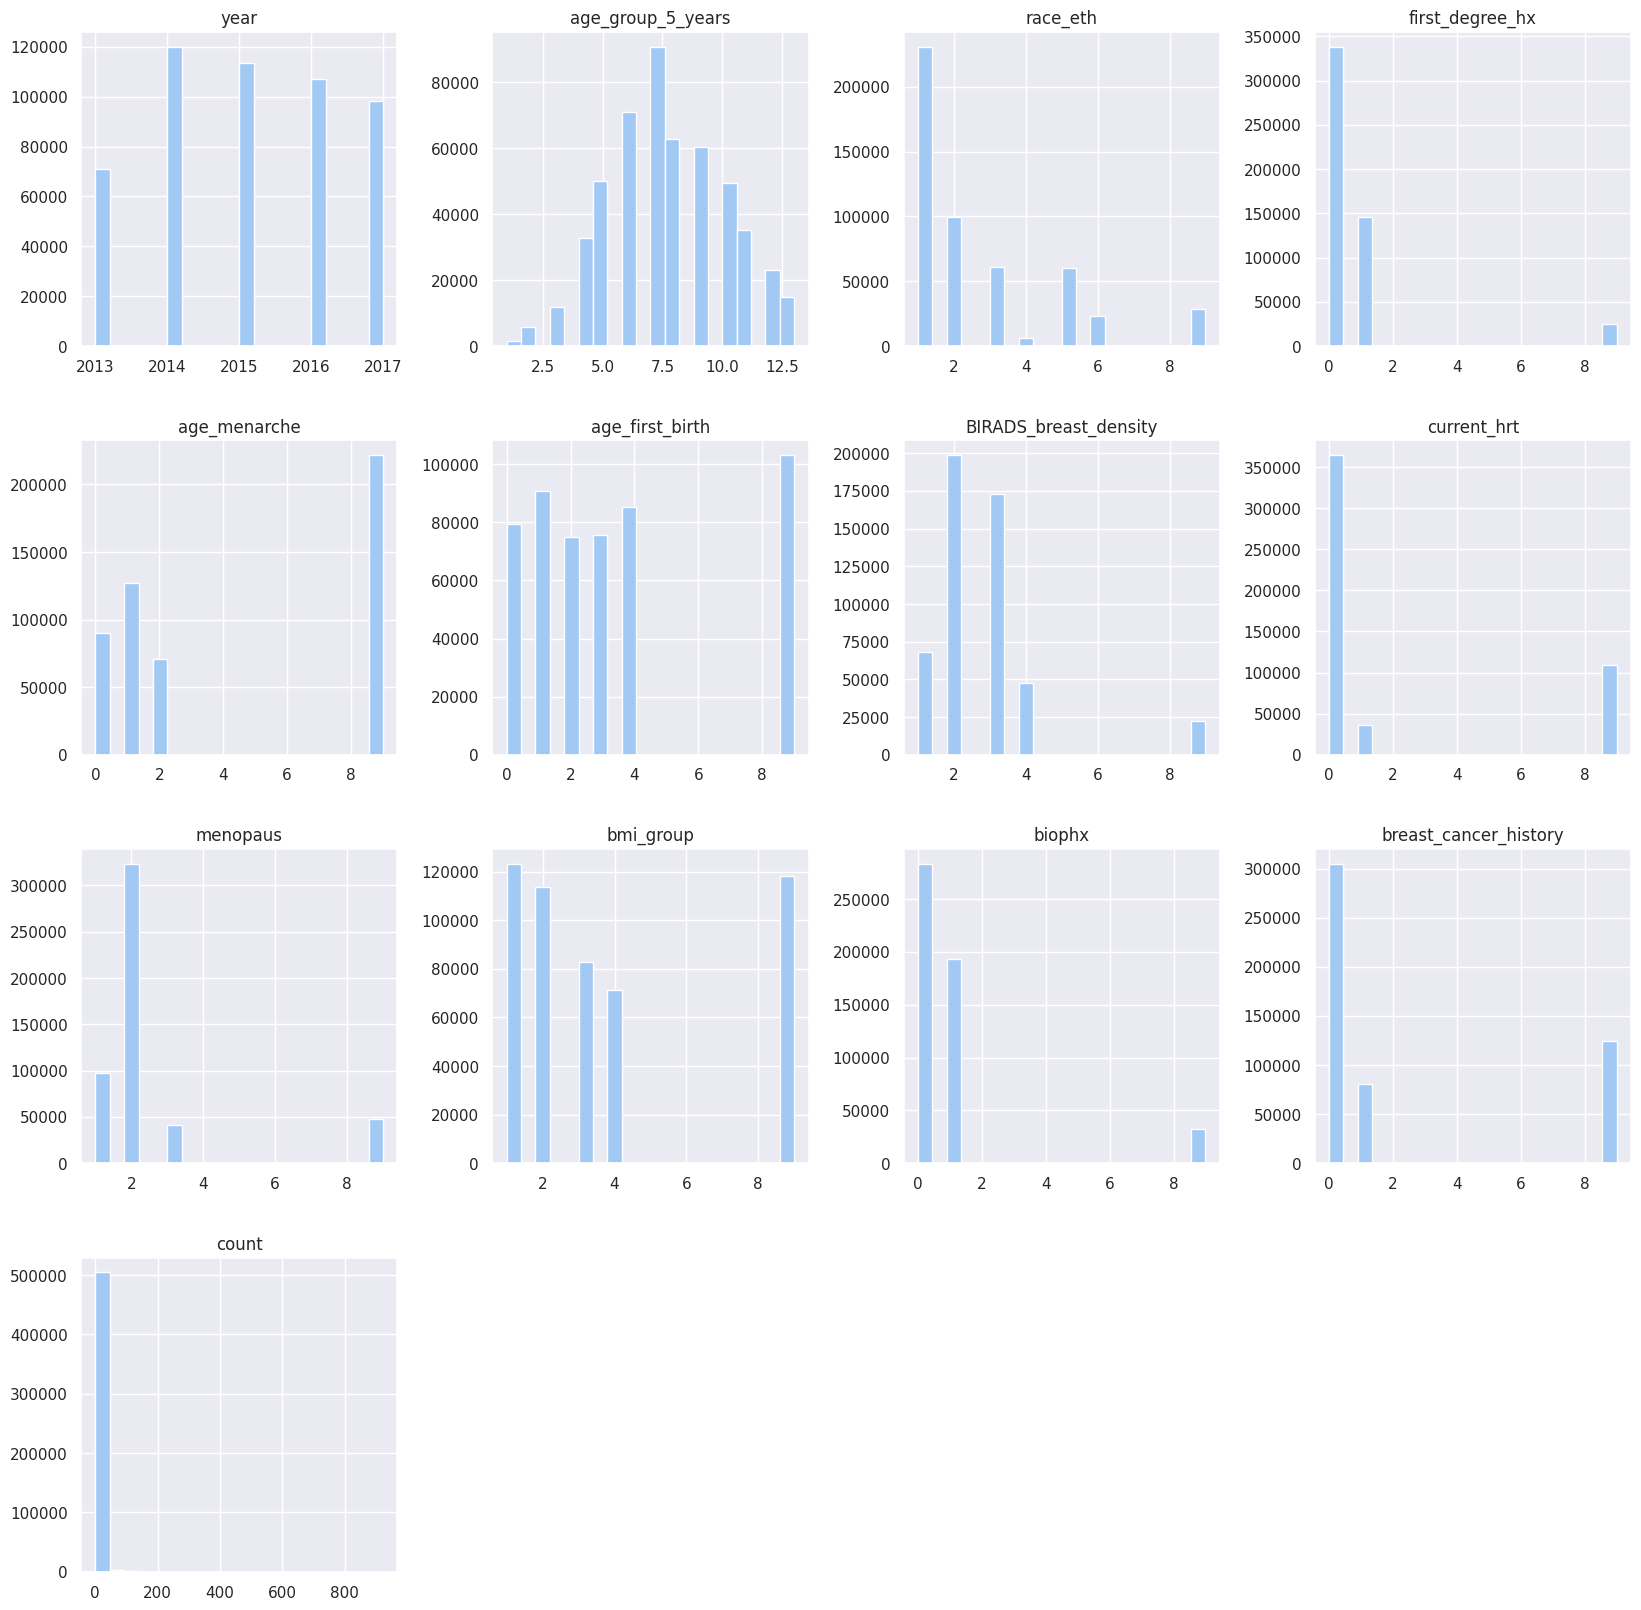

In [ ]:
ori_data.hist(bins=20, figsize=(20, 20))

- Every variable have unknown values, labelled as '9' in each variable.
- 'first_degree_hx', 'current_hrt', 'biophx' and 'breast_cancer_history' are dichotomous variables (having binary values).
- 'count' variable is the the frequency count of the combination of covariates.
- Target variable is the 'breast_cancer_history' variable which contains the information of individuals with prior breast cancer diagnosis.

In [ ]:
# custom_autopct function
def custom_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.4f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

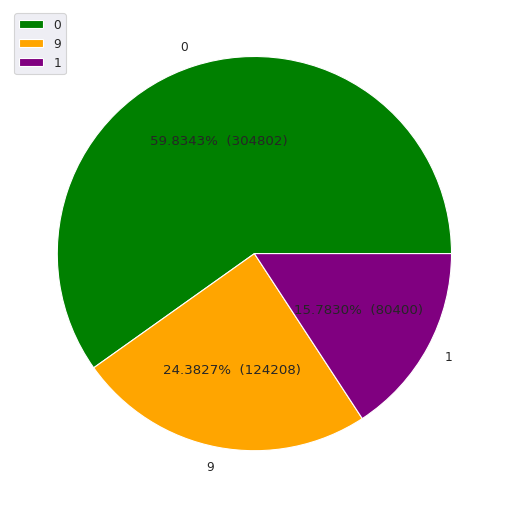

In [ ]:
plt.figure(figsize=(8,8),dpi=80)
breastCancerCount = ori_data['breast_cancer_history'].value_counts()
plt.pie(breastCancerCount, labels=['0','9','1'], colors=['green', 'orange', 'purple'], autopct=custom_autopct(breastCancerCount))
plt.legend(loc='upper left')

- The unknown breast cancer history was about 24 % of the data in the column.
- In order to predict breast cancer occurence of individuals from their risk factors, the unknown values in the target variables are dropped since it would not significantly help in the prediction.

In [ ]:
breast_cancer_historyCount = ori_data['breast_cancer_history'].value_counts()
breast_cancer_historyCount_sorted = breast_cancer_historyCount.sort_values(ascending=False)
breast_cancer_historyCount_sorted

0    304802
9    124208
1     80400
Name: breast_cancer_history, dtype: int64

In [ ]:
ori_data.drop(ori_data.loc[ori_data['breast_cancer_history']==9].index, inplace=True)
ori_data.sample(5)

,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count
143983,2014,8,1,1,9,2,3,0,2,2,1,1,5
335,2013,7,1,0,9,3,9,0,2,2,1,1,2
119342,2014,7,1,0,0,2,4,0,2,1,0,0,24
136694,2014,7,5,1,2,0,2,0,2,3,1,1,1
328004,2016,5,6,0,1,9,3,0,1,2,0,0,1


In [ ]:
ori_data['breast_cancer_history'].unique()

array([0, 1])

- The unknown values have been removed from the target variable.
- The target variable is now dichotomous variable, with '0' for 'no breast cancer' while '1' for 'have breast cancer'.

In [ ]:
ori_data.shape

(385202, 13)

## **Data Cleaning Summary**
-  No missing values, duplicated values, and negative values
-  All the values are formatted and transformed
-  All attributes are unique, no new attributes to be formed or no integration of variables
- The unknown value (labelled as '9') for 'breast_cancer_history' attribute has been removed
- The unique values in the target variable, 0 and 1.
- The data type for breast cancer history will be binary after removing the unknown values and the number of rows reduce to 385,202

In [ ]:
first_degree_hxCount = ori_data['first_degree_hx'].value_counts()
first_degree_hxCount_sorted = first_degree_hxCount.sort_values(ascending=False)
first_degree_hxCount_sorted

0    258395
1    115239
9     11568
Name: first_degree_hx, dtype: int64

# **Exploratory Data Analysis**

In [ ]:
variables = ['race_eth', 'first_degree_hx', 'age_menarche', 'age_first_birth', 'BIRADS_breast_density',
       'current_hrt', 'menopaus', 'bmi_group', 'biophx']

# Count the unknown values in each variable

def relationship (variables):
  for item in variables:
    VCount = (ori_data[item]==9).value_counts()
    print(item, ' Unknown value', VCount)

relationship(variables)

race_eth  Unknown value False    361633
True      23569
Name: race_eth, dtype: int64
first_degree_hx  Unknown value False    373634
True      11568
Name: first_degree_hx, dtype: int64
age_menarche  Unknown value False    225942
True     159260
Name: age_menarche, dtype: int64
age_first_birth  Unknown value False    314324
True      70878
Name: age_first_birth, dtype: int64
BIRADS_breast_density  Unknown value False    367974
True      17228
Name: BIRADS_breast_density, dtype: int64
current_hrt  Unknown value False    343755
True      41447
Name: current_hrt, dtype: int64
menopaus  Unknown value False    355129
True      30073
Name: menopaus, dtype: int64
bmi_group  Unknown value False    309323
True      75879
Name: bmi_group, dtype: int64
biophx  Unknown value False    375727
True       9475
Name: biophx, dtype: int64


- The number of unknown values in 'race_eth', 'first_degree_hx','age_menarche', 'age_first_birth', 'BIRADS_breast_density','current_hrt', 'menopaus', 'bmi_group', 'biophx' varibles are quite significant.
- However, the unknown values (labelled with '9') will be included in the analysis.

## **Age Group Count**

In [ ]:
agegroupCount = ori_data['age_group_5_years'].value_counts()
agegroupCount_sorted = agegroupCount.sort_values(ascending=False)
agegroupCount_sorted

7     70096
6     54608
8     45886
9     44053
5     37346
10    36632
11    26446
4     25383
12    17806
13    11928
3      9433
2      4574
1      1011
Name: age_group_5_years, dtype: int64

Most are the age group of Age 55-59.

Text(0.5, 1.0, 'Histogram of Age Group Count')

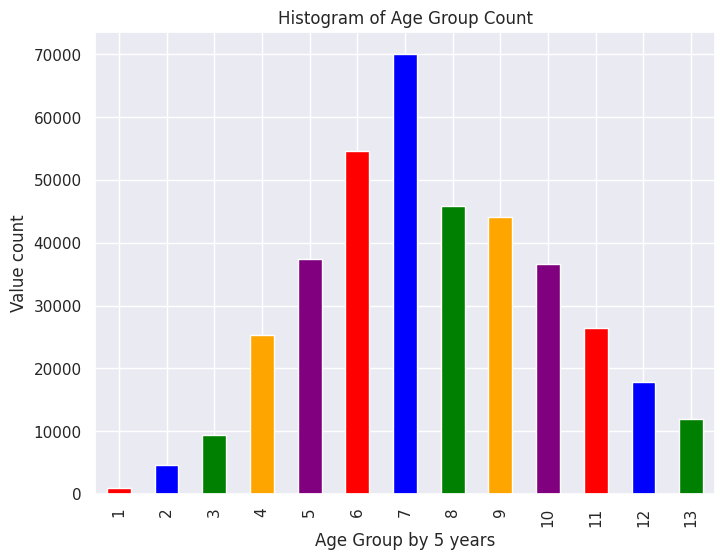

In [ ]:
colors = ['red', 'blue', 'green', 'orange', 'purple']
plt.figure(figsize=(8,6))
ax = ori_data.groupby(['age_group_5_years']).size().plot(kind='bar', color=colors)
plt.xlabel('Age Group by 5 years')
plt.ylabel('Value count')
plt.title('Histogram of Age Group Count')

## **Distribution of each variable after dropping unknown values from target variable, 'breast_cancer_history'.**

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'age_group_5_years'}>,
        <Axes: title={'center': 'race_eth'}>,
        <Axes: title={'center': 'first_degree_hx'}>],
       [<Axes: title={'center': 'age_menarche'}>,
        <Axes: title={'center': 'age_first_birth'}>,
        <Axes: title={'center': 'BIRADS_breast_density'}>,
        <Axes: title={'center': 'current_hrt'}>],
       [<Axes: title={'center': 'menopaus'}>,
        <Axes: title={'center': 'bmi_group'}>,
        <Axes: title={'center': 'biophx'}>,
        <Axes: title={'center': 'breast_cancer_history'}>],
       [<Axes: title={'center': 'count'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

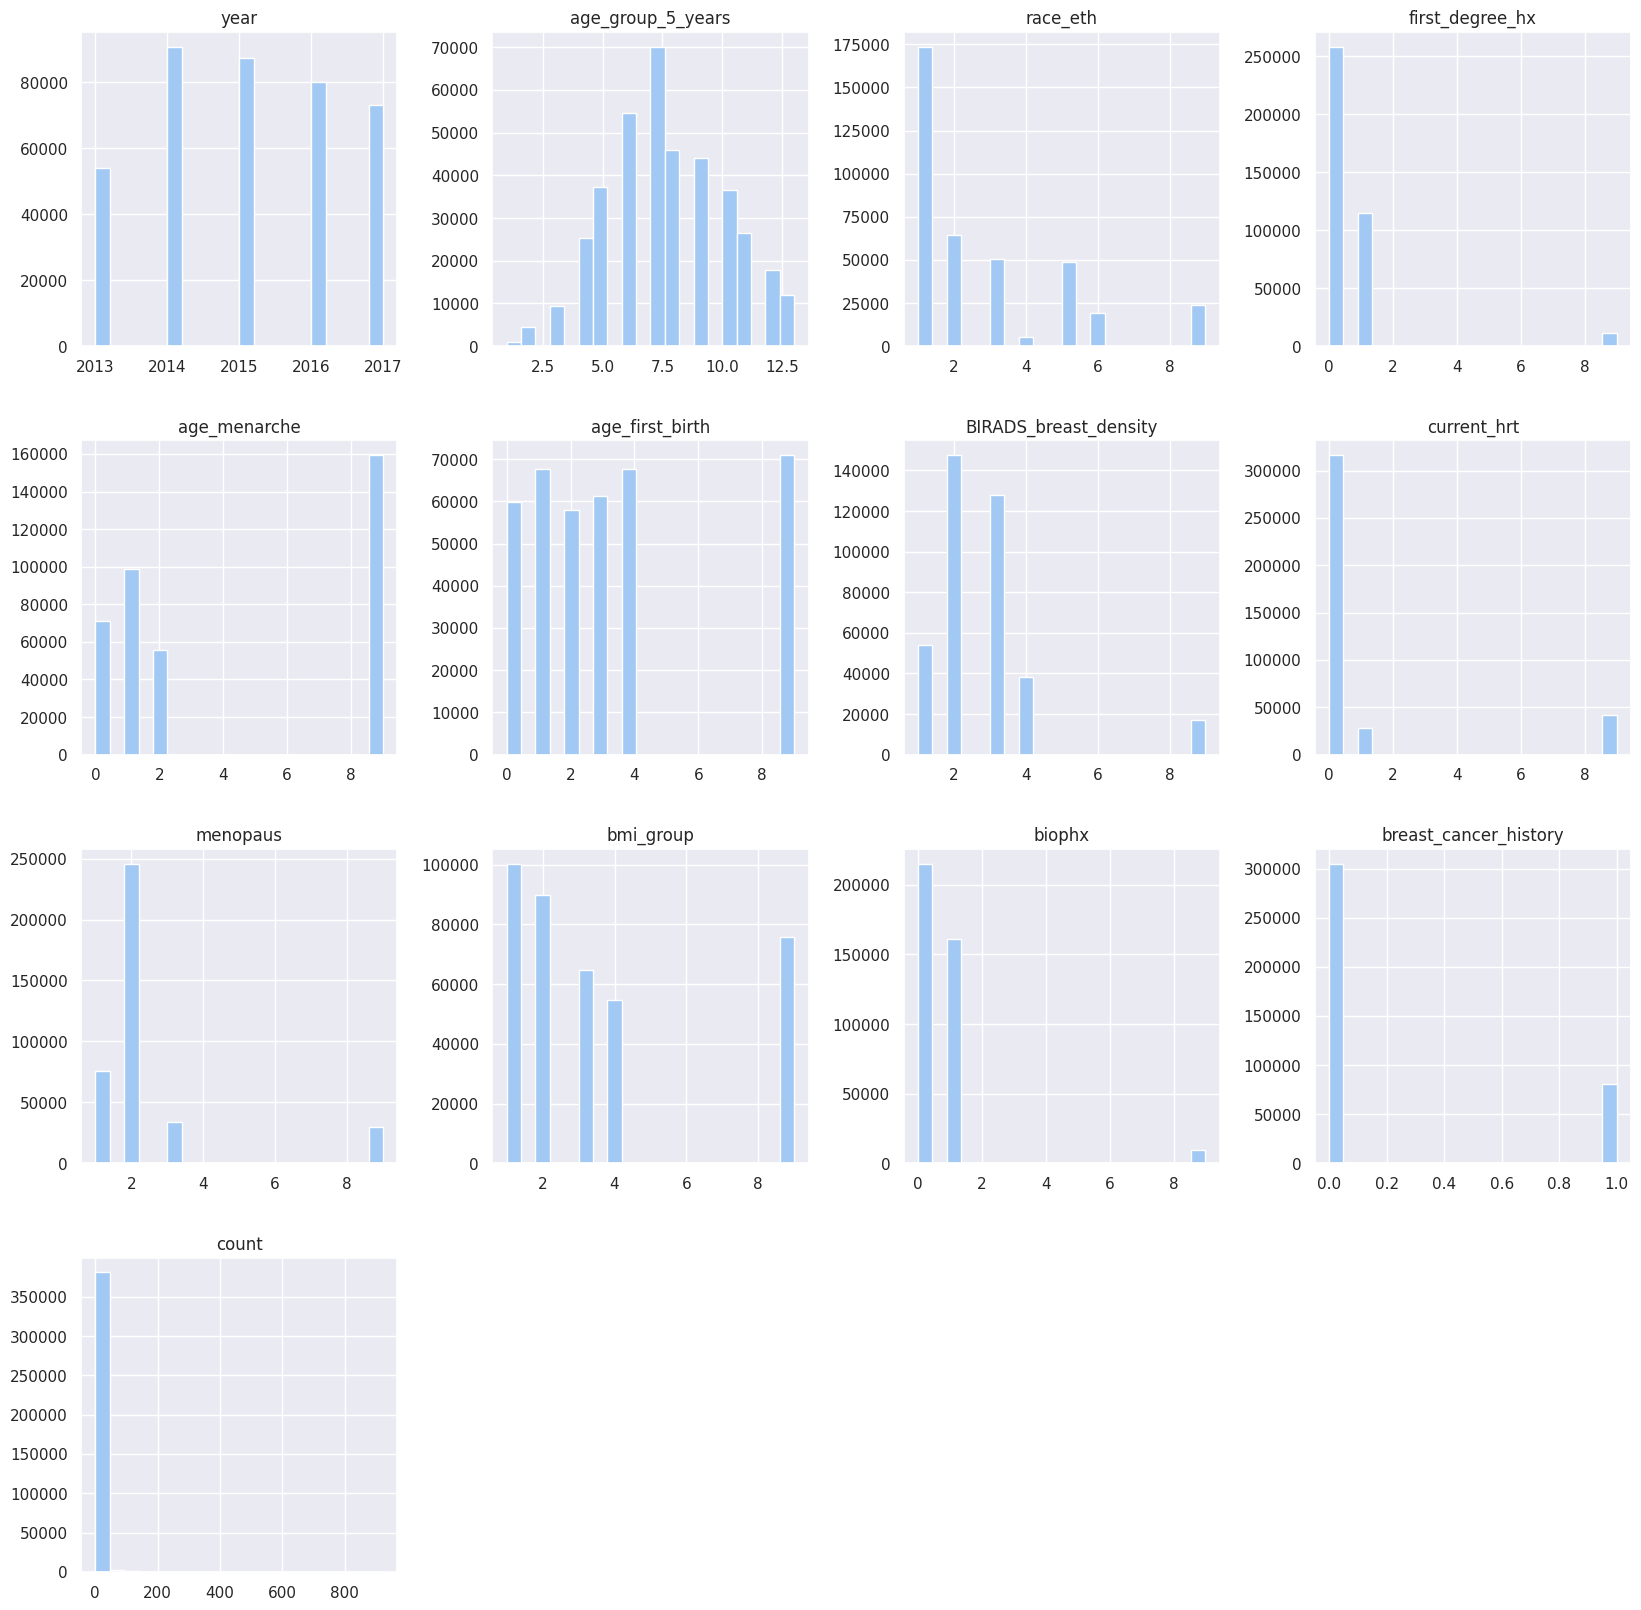

In [ ]:
ori_data.hist(bins=20, figsize=(20, 20))

## **Association between categorical variables using Chi-Square Test and Cramer's V**

The **chi-square statistic** measures the association between categorical variables. In this case, it quantifies the **relationship between the variables.**

Other than chi-square statistics, another commonly used effect size measure is **Cramer's V**, which ranges from 0 to 1. A value closer to 0 indicates a weak association, while a value closer to 1 suggests a strong association. Cramer's V is a measure of the **strength of association** between categorical variables, similar to the correlation coefficient for continuous variables.

Chi-square statistics, p-value and Cremer's V value are evaluated against the variables.

Association between all variables and **breast_cancer_history**

In [ ]:
# Perform the chi-square test and calculate Cramer's V

variables = ['year', 'age_group_5_years', 'race_eth', 'first_degree_hx',
       'age_menarche', 'age_first_birth', 'BIRADS_breast_density',
       'current_hrt', 'menopaus', 'bmi_group', 'biophx']
target = ori_data['breast_cancer_history']

# Create a contingency table of the two categorical variables

def relationship (variables,target):
  for item in variables:
    cont_table = pd.crosstab(ori_data[item], target)
    chi2_stat, p_val, dof, exp_freq = chi2_contingency(cont_table)
    n = cont_table.sum().sum()
    phi2 = chi2_stat/n
    r, k = cont_table.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    cramer_v = np.sqrt(phi2corr / min(r_corr-1, k_corr-1))
    print(item, ' : Chi-square statistic:', chi2_stat)
    print(item, ': P-value:', p_val)
    print(item, ': Degrees of freedom:', dof)
    print(item, ': Cramer\'s V:', cramer_v)

relationship(variables,target)

year  : Chi-square statistic: 749.8425624022218
year : P-value: 5.608585416932995e-161
year : Degrees of freedom: 4
year : Cramer's V: 0.044002755736550846
age_group_5_years  : Chi-square statistic: 18577.9794063524
age_group_5_years : P-value: 0.0
age_group_5_years : Degrees of freedom: 12
age_group_5_years : Cramer's V: 0.21954079315162736
race_eth  : Chi-square statistic: 7660.806825738301
race_eth : P-value: 0.0
race_eth : Degrees of freedom: 6
race_eth : Cramer's V: 0.14096893357607462
first_degree_hx  : Chi-square statistic: 84.80593871101112
first_degree_hx : P-value: 3.8425930470746055e-19
first_degree_hx : Degrees of freedom: 2
first_degree_hx : Cramer's V: 0.014661791046667955
age_menarche  : Chi-square statistic: 875.9806816021635
age_menarche : P-value: 1.4351395190619113e-189
age_menarche : Degrees of freedom: 3
age_menarche : Cramer's V: 0.047605662320201116
age_first_birth  : Chi-square statistic: 325.7465544973318
age_first_birth : P-value: 2.905136231009883e-68
age_fir

- All the variables ('year','age_group_5_years', 'race_eth', 'first_degree_hx', 'age_menarche', 'age_first_birth', 'BIRADS_breast_density', 'current_hrt', 'menopaus', 'bmi_group', 'biophx') show siginificant association to having breast cancer as p-value is less than 0.05.

- Each variable shows a significant association with breast cancer occurrence, as indicated by the small p-values. The strength of the associations varies from weak ('year', 'first_degree_hx', 'age_menarche', 'age_first_birth', 'BIRADS_breast_density') to moderate ('race_eth', 'current_hrt', 'bmi_group') and even strong ('age_group_5_years', 'menopaus', 'biophx').

- In summary, age group, those who are menopause, and those who have done biopsy or aspiration has strong significant association with breast cancer occurence from the statistics shown above.


## **Race Count**

In [ ]:
raceCount = ori_data['race_eth'].value_counts()
raceCount_sorted = raceCount.sort_values(ascending=False)
raceCount_sorted

1    173616
2     64578
3     50431
5     48673
9     23569
6     19109
4      5226
Name: race_eth, dtype: int64

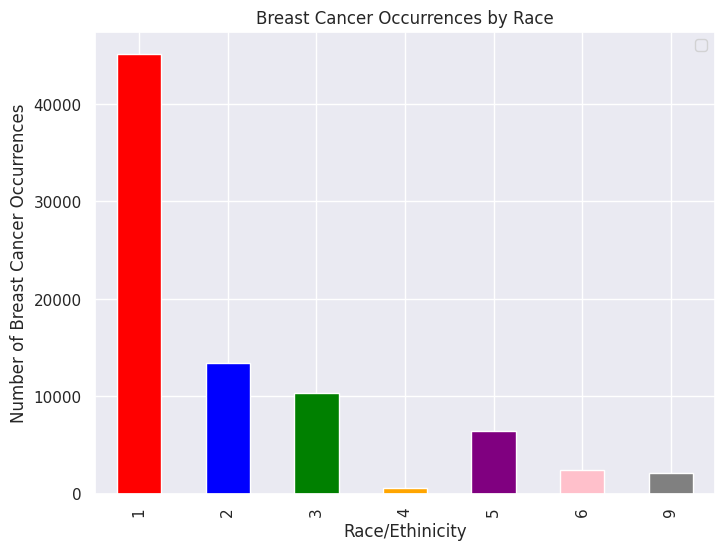

In [ ]:
data = ori_data[ori_data['breast_cancer_history'] == 1]

colors = ['red', 'blue', 'green', 'orange', 'purple', 'pink', 'grey']
plt.figure(figsize=(8,6))
ax = data.groupby(['race_eth']).size().plot(kind='bar', color=colors)
plt.xlabel('Race/Ethinicity')
plt.ylabel('Number of Breast Cancer Occurrences')
plt.title('Breast Cancer Occurrences by Race')
plt.legend(loc='best')

Most non-Hispanic white ('1') are prone to breast cancer while Native American have the lowest number for breast cancer among the race.

## **Distribution of target variable value**

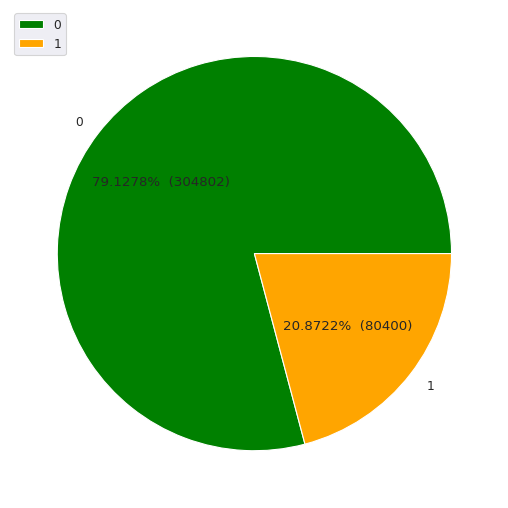

In [ ]:
plt.figure(figsize=(8,8),dpi=80)
breastCancerCount = ori_data['breast_cancer_history'].value_counts()
plt.pie(breastCancerCount, labels=['0','1'], colors=['green', 'orange'], autopct=custom_autopct(breastCancerCount))
plt.legend(loc='upper left')

About 79 % of the data consists of those who do not have breast cancer history while 21 % of the data has breast cancer.

## **Heatmap Correlation**

<Axes: >

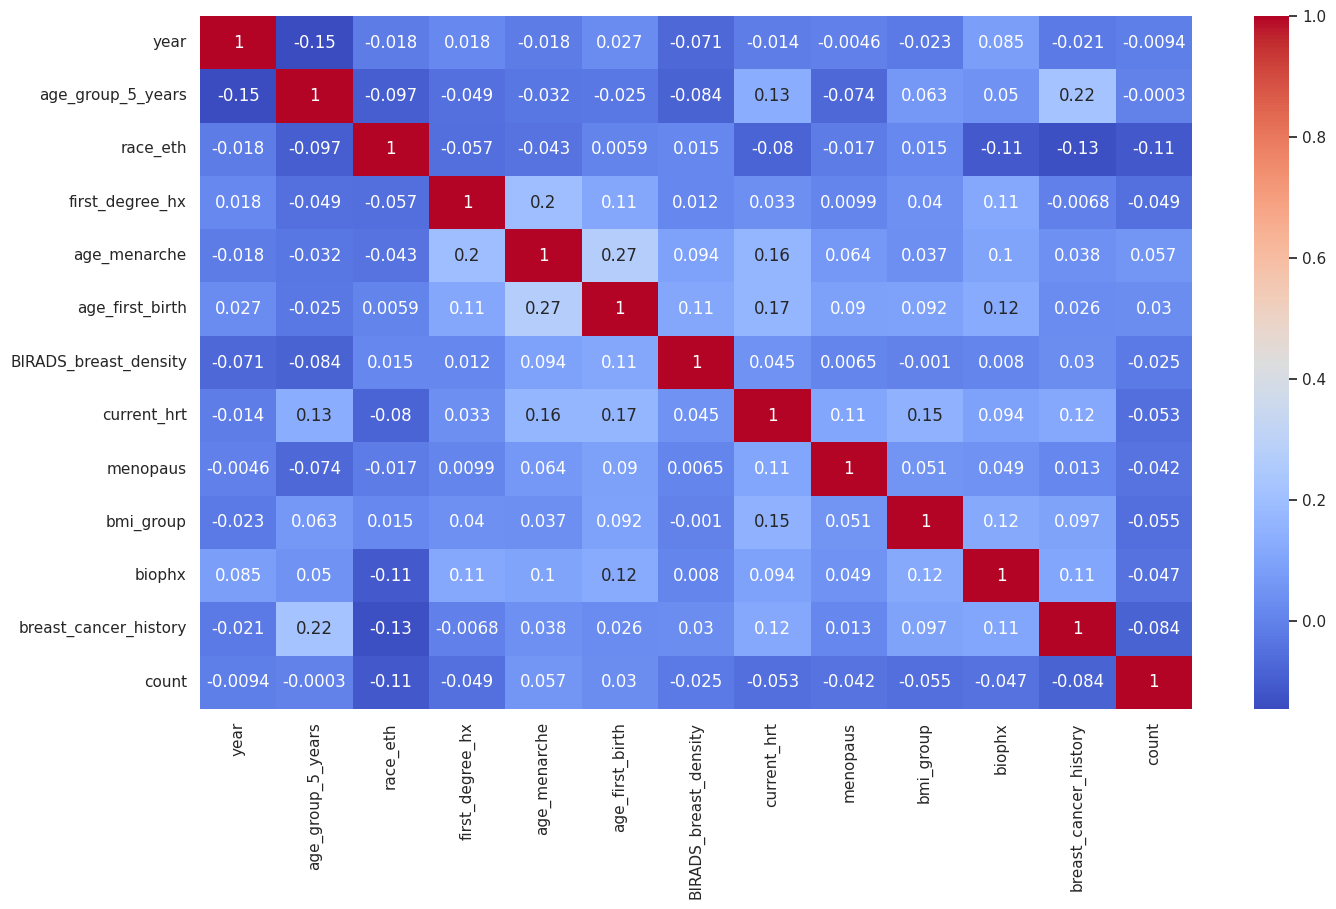

In [ ]:
cormat = ori_data.corr()
round(cormat,2)
sns.heatmap(cormat, annot=True, cmap='coolwarm')

- Since 'count' variable is poorly correlated with all other variables, it is decided to drop from the dataset.

- Modelling will be focused on 'breast cancer history' as the target variable while other variables will be the predictor variables.

### To drop 'count' column from the dataset

In [ ]:
# To drop "count" column in the dataset
ori_data.drop('count', axis=1, inplace=True)

ori_data.head()

,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history
0,2013,7,1,0,9,3,1,1,2,3,0,0
1,2013,7,1,0,9,3,1,1,2,3,1,0
2,2013,7,1,0,9,3,1,1,2,4,0,0
3,2013,7,1,0,9,3,1,1,2,4,1,0
4,2013,7,1,0,9,3,1,1,2,4,1,1


# **Machine Learning Modelling**

The models used in this project are:-
- Support Vector Machines (SVM)
- Naive Bayes
- Logistic Regression
- Extreme Gradient Boosting (XGBoost)

-- The execution of modelling, evaluation and deployment of each model will be shown as follows.

-- For machine learning models, data will be split into into 80-20, 70-30 and 60-40 for training and testing respectively.

-- In doing this, the best data split for the project will be obtained.

-- Then, we will use the best data split to run for all the models in order to obtain the best model.

In [ ]:
X = ori_data.drop("breast_cancer_history", axis=1)
y = ori_data['breast_cancer_history']

## **80-20 Split**

In [ ]:
#test size 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40 )

models = [SVC(),
          BernoulliNB(),
          LogisticRegression(),
          XGBClassifier()
          ]

names = ['SVM',
         'Naive Bayes',
         'Logistic Regression',
         'XG Boost'
         ]

In [ ]:
model_accuracy = []

for name in models:
    model = name
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    test_score = accuracy_score(y_test, y_pred)
    model_accuracy.append(test_score)


evaluation = pd.DataFrame({'Models': names,
                           'Model accuracy': model_accuracy})

evaluation.sort_values(by="Model accuracy",ascending=False)

,Models,Model accuracy
3,XG Boost,0.814372
0,SVM,0.791397
1,Naive Bayes,0.791397
2,Logistic Regression,0.790047


From the above result obtained, when using a SVM model on this particular dataset with 80% training and 20% testing, it achieves an accuracy of 79.14% which is the same as Naive Bayes. Besides, Logistic Regression gives an accuracy of 79.00%, whereas XG Boost yields an accuracy of 81.44%. In conclusion, it can be concluded that XG Boost performs the best among all other models using a data splitting ratio of 80% for training and 20%.

## **70-30 Split**

In [ ]:
#test size 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40 )

models = [SVC(),
          BernoulliNB(),
          LogisticRegression(),
          XGBClassifier()
          ]

names = ['SVM',
         'Naive Bayes',
         'Logistic Regression',
         'XG Boost'
         ]

In [ ]:
model_accuracy = []

for name in models:
    model = name
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    test_score = accuracy_score(y_test, y_pred)
    model_accuracy.append(test_score)


evaluation = pd.DataFrame({'Models': names,
                           'Model accuracy': model_accuracy})

evaluation.sort_values(by="Model accuracy",ascending=False)

,Models,Model accuracy
3,XG Boost,0.813986
0,SVM,0.791011
1,Naive Bayes,0.791011
2,Logistic Regression,0.790024


From the above result obtained, when using a SVM model on this particular dataset with 70% training and 30% testing, it achieves an accuracy of 79.10% which is the same as Naive Bayes. Besides, Logistic Regression gives an accuracy of 79.00%, whereas XG Boost yields an accuracy of 81.40%. In conclusion, it can be concluded that XG Boost performs the best among all other models using a data splitting ratio of 70% for training and 30%.

## **60-40 Split**

In [ ]:
#test size 0.4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=40 )

models = [SVC(),
          BernoulliNB(),
          LogisticRegression(),
          XGBClassifier()
          ]

names = ['SVM',
         'Naive Bayes',
         'Logistic Regression',
         'XG Boost'
         ]

In [ ]:
model_accuracy = []

for name in models:
    model = name
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    test_score = accuracy_score(y_test, y_pred)
    model_accuracy.append(test_score)


evaluation = pd.DataFrame({'Models': names,
                           'Model accuracy': model_accuracy})

evaluation.sort_values(by="Model accuracy",ascending=False)

,Models,Model accuracy
3,XG Boost,0.813605
0,SVM,0.791428
1,Naive Bayes,0.791428
2,Logistic Regression,0.790260


From the above result obtained, when using a SVM model on this particular dataset with 60% training and 40% testing, it achieves an accuracy of 79.14% which is the same as Naive Bayes. Besides, Logistic Regression gives an accuracy of 79.03%, whereas XG Boost yields an accuracy of 81.36%. In conclusion, it can be concluded that XG Boost performs the best among all other models using a data splitting ratio of 60% for training and 40%.

# **Result Evaluation and Interpretation**

The findings as well as the analysis of results in each model will be illustrated below using a table.



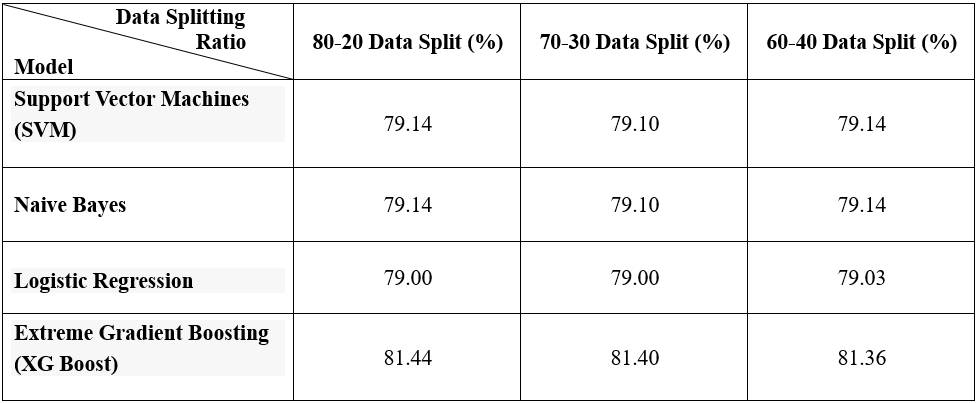

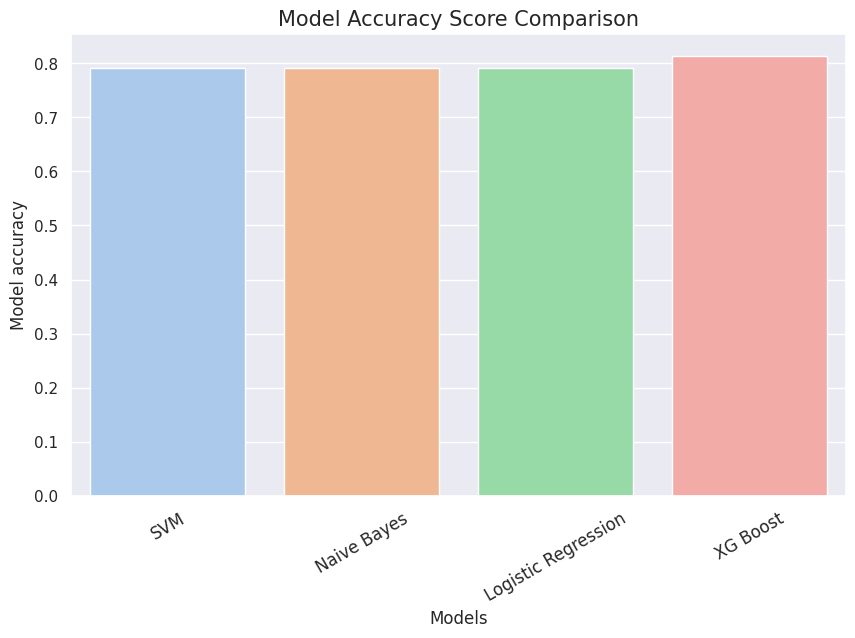

In [ ]:
#visualization of model scores
plt.figure(figsize = (10, 6))
sns.barplot(x = evaluation["Models"], y = evaluation["Model accuracy"])
plt.title("Model Accuracy Score Comparison", size = 15)
plt.xticks(rotation = 30, size = 12)
plt.show()

- Overall, XG Boost has the highest accuracy, with 81.44% using 80-20 data split.
- XG Boost is better at predicting breast cancer occurence compared to SVM (79.14%), Naive Bayes (79.14%) and Logistic Regression (79.00%).
- Hence, XG Boost is the best predictive model for breast cancer prediction.

### **Best Model and its Evaluation Metrics**



In [ ]:
# Model building using Extreme Gradient Boosting Model with 80-20 split
from xgboost import XGBClassifier

#test size 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40 )

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print("Accuracy with XGBoost is", round((accuracy_score(y_test, y_pred)*100),2),'%')

Accuracy with XGBoost is 81.44 %


In [ ]:
# Evaluating model
from sklearn.metrics import (accuracy_score, f1_score,average_precision_score, confusion_matrix,
                             average_precision_score, precision_score, recall_score, roc_auc_score, classification_report, roc_curve,auc )

CM_XGB = confusion_matrix(y_test,y_pred)
CR_XGB = classification_report(y_test,y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n",CM_XGB)
print("Classification Report:\n",CR_XGB)
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))

Accuracy: 0.8143715683856648
Confusion Matrix:
 [[58290  2680]
 [11621  4450]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89     60970
           1       0.62      0.28      0.38     16071

    accuracy                           0.81     77041
   macro avg       0.73      0.62      0.64     77041
weighted avg       0.79      0.81      0.78     77041

Precision: 0.6241234221598878
Recall: 0.27689627278949663
F1: 0.38360415499331924
Area under precision (AUC) Recall: 0.32365920893925837


### **Confusion Matrix**

Text(166.25, 0.5, 'Actual')

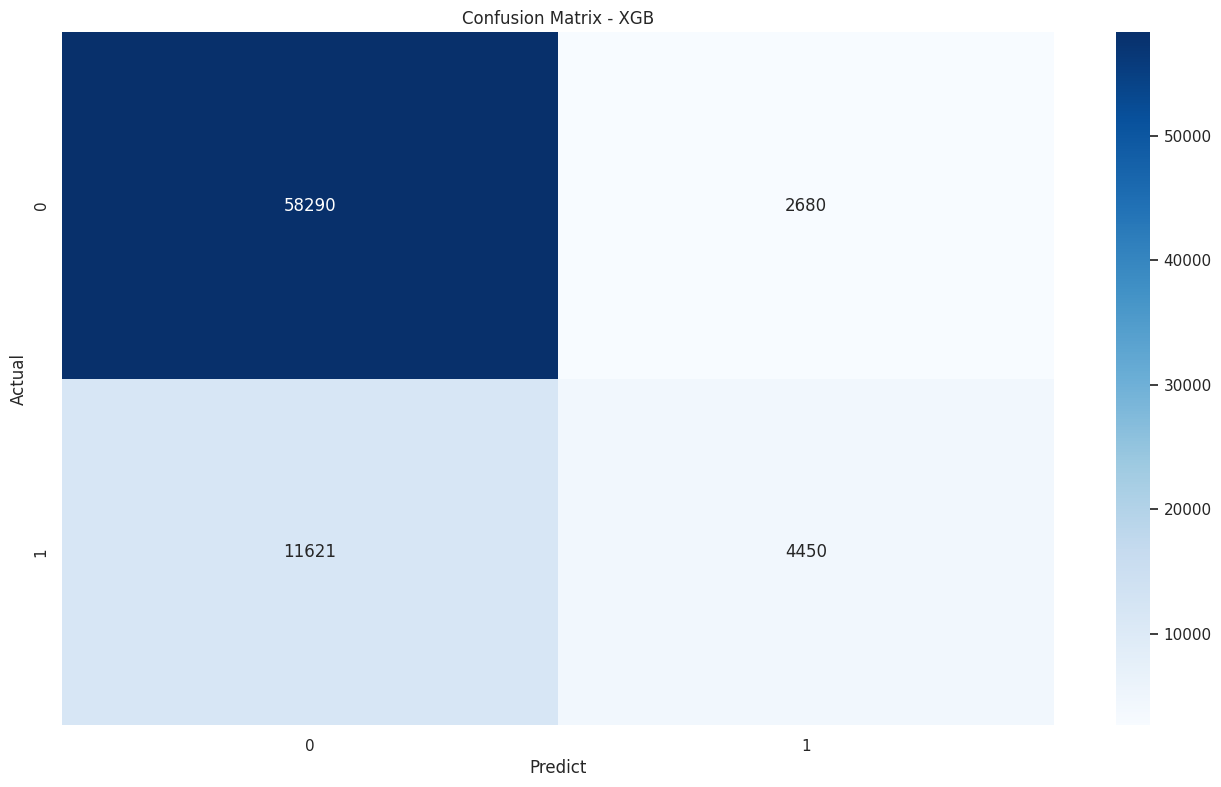

In [ ]:
# Confusion Matrix
#dataframe
df_xgb = pd.DataFrame(CM_XGB)
df_xgb
ax = sns.heatmap(df_xgb,annot=True,fmt='.20g',cmap='Blues')
ax.set_title('Confusion Matrix - XGB')
ax.set_xlabel('Predict') #x
ax.set_ylabel('Actual') #y

From the above, it can be concluded that the model predicted correctly that 58,290 who have no breast cancer, whereas 4,450 who have breast cancer.

## **Feature Importance from the Model**

In [ ]:
feature_importance = xgb.feature_importances_
importance_df = pd.DataFrame({'features': X_train.columns,
                              'importance': feature_importance})
importance_df.sort_values(by='importance', ascending=False, inplace=True)
importance_df

,features,importance
10,biophx,0.533218
1,age_group_5_years,0.093399
7,current_hrt,0.081812
9,bmi_group,0.048578
2,race_eth,0.045061
6,BIRADS_breast_density,0.044421
4,age_menarche,0.043864
8,menopaus,0.036084
3,first_degree_hx,0.030974
0,year,0.021549


With the result obtained above, it can be concluded that the feature named "biophx" is the most crucial feature in predicting breast cancer by using XG Boost model.

## **Deployment**

### Plan Deployment
- Deployment of the BEST predictive model, XG Boost for breast cancer prediction.
- A user-friendly web application interface will be created to allow users to enter pertinent patient data and receive breast cancer forecasts.
- Breast cancer can be predicted just by obtaining the risk factors of patients and input these details into the web application.
- This web application can be adopted by healthcare providers such as hospitals, clinics, private practices, community health centers, telehealth providers and home healthcare providers.


# **Conclusion**

- In a nutshell, the key importance on risk factors of breast cancer for machine learning models have been extracted which are biophx (previous breast biopsy), age_group_5_years (age groups), and current_hrt (use of hormone replacement therapy).

- We have performed 4 machine learning models which are SVM, Naive Bayes, Logistic Regression and XG Boost.

- Moreover, after splitting the data into 80-20, 70-30 and 60-40 for training as well as testing, the four models which are Support Vector Machines (SVM), Naive Bayes, Logistic Regression and Extreme Gradient Boosting (XGBoost) were tested. In results of this, XG Boost achieves the highest accuracy of 81.44% by using a 80-20 data split.

- In addition, in order to evaluate the performance of XG Boost model, a few metrics are used in this project. This includes accuracy score, F1 score, confusion matrix, precision score, recall score, Area Under Precision (AUC) score and classification report. With this, the main evaluation in this project is accuracy. It allows to meet the expectations in terms of accuracy and comprehensiveness of the model.

- Besides that, it is concluded that "biophx" feature is the best features among all the other features by using XG Boost model.

- Lastly, based on the analysis and evaluation conducted in this project, the XG Boost model is the best predictive model to provide breast cancer risk assessment services.